# POSTGRES

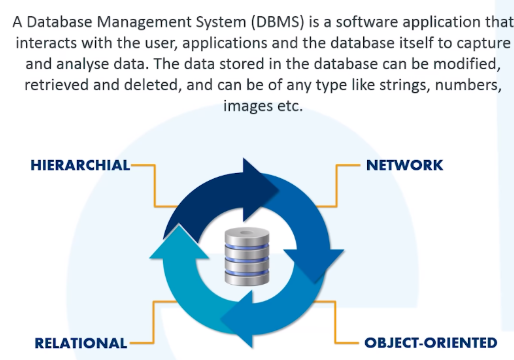

In [ ]:
# Command line codes : 

psql -U username databaseName # login to database from cmd | example : psql -U postgres

\q #quit the database

\c databaseName # switch to another database

\l # show list of all databases

\d #shows all tables and relations in current database

\dt #only show tables

\d tableName #describes a specific table

\i C:Users/Bob/Downloads/script.sql   # runs the sql script
    
# Export selected data from postgres into csv file :
\copy (select * from person) TO 'C:/Users/Bob/Downloads/results.csv' DELIMITER ',' CSV HEADER;


In [ ]:
# create and delete database

create database databaseName; #creates database

drop database databaseName; # deletes database

Schema vs Database

A database is the main container, it contains the data and log files, and all the schemas within it. You always backup a database, it is a discrete unit on its own.<br>
Schemas are like folders within a database, and are mainly used to group logical objects together, which leads to ease of setting permissions by schema.

<br><br>Schema should be created inside a database. The basic syntax of CREATE SCHEMA is as follows :<br>
CREATE SCHEMA name;

In [ ]:
# The basic syntax to create table in schema is as follows
CREATE TABLE myschema.mytable (
...
);

create schema myschema;

create table myschema.company(
   ID   INT              NOT NULL,
   NAME VARCHAR (20)     NOT NULL,
   AGE  INT              NOT NULL,
   ADDRESS  CHAR (25),
   SALARY   DECIMAL (18, 2),
   PRIMARY KEY (ID));

DROP SCHEMA myschema CASCADE;  # drop full schema with tables with rows inside

DROP SCHEMA myschema;   # drop empty schema


In [ ]:
# create and drop table

create table table_name ( column name + data type + constraints(if any) );  #creates a table

create table person (id int, first_name varchar(50), 
                     last_name varchar(50), 
                     gender varchar(6), 
                     date_of_birth timestamp);


create table person(id bigserial not null primary key,  
                    first_name varchar(50) not null,
   		            last_name varchar(50) not null,  
                    gender varchar(7) not null,
   		            date_of_birth date not null,  
                    email varchar(100),
                    Country_of_birth varchar(150) not null);

drop table table_name;   #deletes table

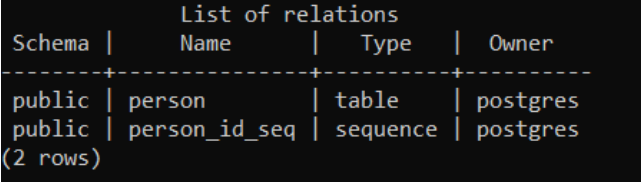
Person_id_seq : created because of bigserial primary key

In [ ]:
# data types

bigserial # signed integer that auto increments


# data types of numeric type :
NUMERIC
smallint
integer
bigint
decimal
numeric
double precision
        
money : # the money type stores a currecny amount with a fixed fractional percision. values of numberic

boolean : # True or False value
    

character varying (N)  # variable length with limit
varchar (N) # variable length with limit
text # variable with unlimited length

# first number = how many digits before decimal point
#second number = how many digits after decimal point
price NUMERIC(19, 2) NOT NULL

Serials: # all serials are autoincrement
          Smallserial
          serial
          bigserial # BIGSERIAL : it is same as BIGINT but has auto increment function and can also be incremented by the user if invoked.

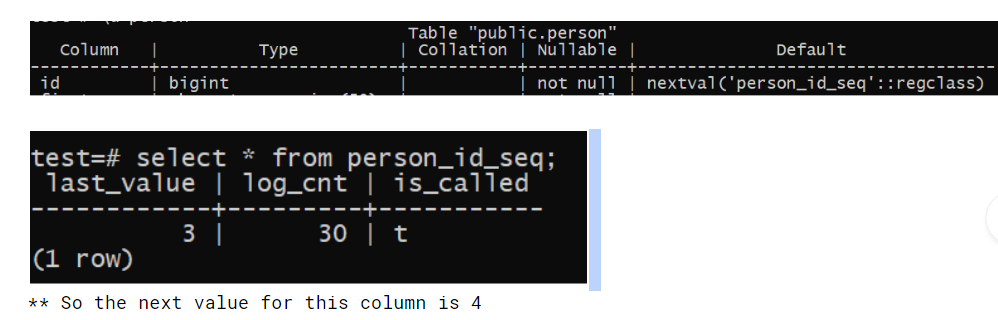

UUID  = universally unique identifiers
uuid is a type of identifier that is pretty much impossible to be duplicate of another uuid and can be used as primary key in postgres databases

Benefits of using uuid instead of BIGINT:
*	it will be harder for attackers to guess the sequence of ids in our database
*	easier to migrate database to other locations

In [ ]:
CREATE EXTENSION IF NOT EXISTS "uuid-ossp";  # installs uuid extension on postgres

# Setting foreign keys with uuid:
update person set car_uid = '17d11cd6-a272-477d-83c3-1f164c619624' where person_uid = 'ed0fd5a9-f7db-48ed-966a-e8c9517b8276';


In [ ]:
# Inserting into database :

insert into person(first_name, last_name, gender, date_of_birth) values ('Anne', 'Smith', 'F', date '1988-01-09');
insert into person(first_name, last_name, gender, date_of_birth, email) values ('Jake', 'Sanderson', 'M', date '1990-12-31', 'jake@gmail.com');

In [ ]:
# Querying the database

SELECT * FROM table_name;  # get everything from table

SELECT FROM table_name;   # gets number of all rows of table

SELECT first_name, last_name FROM person;

# ASC / DESC
# ASC : 1 2 3 4 5 A B C D
# DESC : 5 4 3 2 1 D C B A
select * from person order by country_of_birth asc; # ASC is the default so it is not necessary to write it.

select * from person order by country_of_birth desc;   # last to first

# order by
Select * from person order by id desc;   # last row to first

# when you order by descending, it will first show the rows that are empty for the descending column

select * from person order by date_of_birth; # goes from small to big so it moves from oldest to youngest person

# DISTINCT
select distinct country_of_birth from person order by country_of_birth desc;  # only unique values will be returned

select distinct country_of_birth from person;

# WHERE | AND | OR
select * from person WHERE gender = 'Female';

select * from person WHERE gender = 'Male' AND country_of_birth = 'Poland';

select * from person where gender = 'Male' and (country_of_birth='Poland' OR country_of_birth='China');

select * from person where gender = 'Male' and (country_of_birth='Poland' OR country_of_birth='China') and last_name='Guiet';

# LIMIT | OFFSET
select * from person LIMIT 10;

select * from person OFFSET 5;   # all rows except first 5

select * from person OFFSET 5 fetch first 5 row only;   # skip first 5 rows and limit to 5
select * from person OFFSET 5 limit 5;   # skip first 5 rows and limit to 5

# IN
select * from person where country_of_birth = 'China' or country_of_birth='Brazil' or country_of_birth = 'France' limit 10;
select * from person where country_of_birth IN ('China', 'Brazil', 'France') limit 10;

# BETWEEN
Select * from person where date_of_birth BETWEEN date '2018-01-01' AND '2018-08-01';

# show only even or odd rows
Select * from MEN where (RowID % 2) = 1

Select * from MEN where (RowID % 2) = 0


In [ ]:
select * from person where car_id is null;  # all rows where this column is empty

select * from person where car_id is not null;  # all rows where column not empty

In [ ]:
# LIKE | ILIKE | wild cards

select * from person where email LIKE '%.com';

select * from person where email LIKE '%.ru' order by email desc;

select * from person where email LIKE '%@bloomberg.com';

select * from person where email like '%@google.%';   # using two wild cards, when after % is empty it means anything can go here.

select * from person where email like '_____@%';    # selects all people where their email has 5 characters before @

select * from person where country_of_birth LIKE 'P%' limit 5;

select * from person where country_of_birth ILIKE 'p%' limit 5;  # ILIKE is same as LIKE but case insensitive

In [ ]:
# Aggregate Functions

# COUNT
select country_of_birth from person GROUP BY country_of_birth;  # makes groups based on the each unique value of the column

COUNT() # is an aggregate function and can’t be used without a group by, where,... 

select country_of_birth, COUNT(*) from person GROUP BY country_of_birth order by COUNT(*) desc;   
# count() method counts number of each record for each of the groups made with group by.

# HAVING keyword should be used right after group by clause
select country_of_birth, COUNT(*) from person GROUP BY country_of_birth HAVING COUNT(*) > 7 order by COUNT(*) desc;  

select gender, COUNT('Male') from person GROUP BY gender;

Select COUNT(*) from car;

# MAX | MIN | AVG | SUM
select MAX(price) from car;

select MIN(price) from car;

select AVG(price) from car;

select ROUND(AVG(price)) from car;    # round down the value to integer

select make, model, MIN(price) from car GROUP BY make, model;
# group by the cars by brand and model (each unique combination of brand and model is a group) and find minimum price for each of these groups

select make, MAX(price) from car group by make order by MAX(price) desc;

select SUM(price) from car where make = 'Hummer';  # adds up all values of price column for the brand Hummer

select make, SUM(price) from car group by make;

select make, SUM(price) from car group by make order by SUM(price) desc;


# What does SQL clause “GROUP BY 1” mean?
# means - group by first column from SELECT . The same pattern could be used for ORDER BY


# add two count(*) results together on two different tables
SELECT
    (SELECT COUNT(*) FROM Toys WHERE little_kid_id = 900)+
    (SELECT COUNT(*) FROM Games WHERE little_kid1 = 900 OR little_kid2 = 900 OR little_kid3 = 900)
AS SumCount;


#Selecting COUNT(*) with DISTINCT
#Count all the DISTINCT program names by program type and push number
SELECT COUNT(DISTINCT program_name) AS Count, program_type AS [Type] 
FROM cm_production WHERE push_number=@push_number GROUP BY program_type;


In [ ]:
# AS

select id, make, model, price As original_price, 
       round(price * 0.10, 2) AS discount, 
       round(price - (price * 0.10), 2) AS discounted_price from car;
        
select id, make, model, price,round(price * .10, 2) from car;
select id, make, model, price, round(price - (price * 0.10), 2) from car;

# using math
select 10^2;   
select 10+2;   
select 10!; # factorial    
select 10 % 3;

SQRT()  # square root of a number

POWER(m, n)  # number m to the power of n

In [ ]:
# COALESCE | NULLIF

# COALESCE will return second (or third) value if first (or first and second) value is null
select COALESCE(1);

select COALESCE(null, null, 1) AS number;

select COALESCE(email, 'email not provided') from person;


select NULLIF(10, 10);   # returns true when both values are same

select NULLIF(10, 3);     #  returns false when values are different

select COALESCE(10 / NULLIF(0, 0), 0);  # this way postgres won't throw error for division by zero

In [ ]:
# DATE and TIME

select NOW();  # returns timestamp

select NOW()::DATE;  #returns only date

select NOW()::TIME;  #returns only time

select NOW() - INTERVAL '1 YEAR';   # go  back in time a year

select  NOW() - INTERVAL '10 DAYS’;

select  NOW() - INTERVAL '3 MONTHS';

select NOW() +INTERVAL '6 MONTHS';  # go ahead 6 months from now

select (NOW() + INTERVAL '6 MONTHS')::DATE;
        
select EXTRACT(YEAR FROM NOW()); # returns only year

select EXTRACT(CENTURY from NOW());

select first_name, last_name , AGE(NOW()::DATE, date_of_birth) AS age from person;

Pimary Key<br>
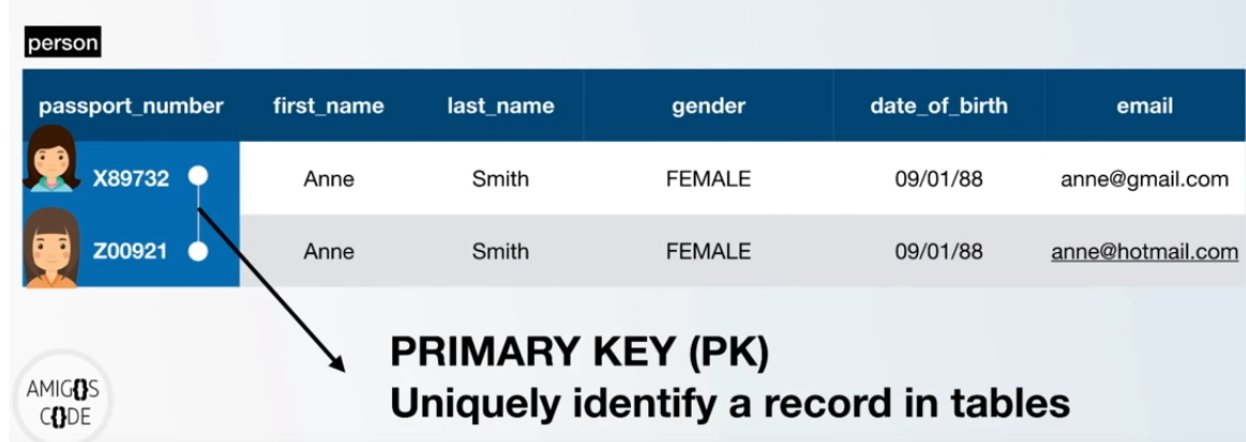


In [ ]:
# primary key is unique for each row of the table and can’t be repeated since its unique.
# you can’t add primary key to a table when there are duplicate rows.

ALTER TABLE person ADD PRIMARY KEY (id); #Add primary key:

ALTER TABLE person DROP CONSTRAINT person_pkey; # How to remove primary key

In [ ]:
# ALTER TABLE

# adding a column to table
ALTER TABLE table_name ADD column_name datatype;

# drop column from table
ALTER TABLE table_name DROP COLUMN column_name;

# change data type of a column
ALTER TABLE table_name ALTER COLUMN column_name TYPE datatype;

# set column to not null
ALTER TABLE table_name MODIFY column_name datatype NOT NULL;

# adding unique constraint
ALTER TABLE table_name ADD CONSTRAINT MyUniqueConstraint UNIQUE(column1, column2...);

# add check constraint
ALTER TABLE table_name ADD CONSTRAINT MyUniqueConstraint CHECK (CONDITION);


#### INDEX :

Indexes are special lookup tables that the database search engine can use to speed up data retrieval. 
Simply put, an index is a pointer to data in a table. An index in a database is very similar to an index in the back of a book. For example, if you want to reference all pages in a book that discusses a certain topic, you have to first refer to the index, which lists all topics alphabetically and then refer to one or more specific page numbers. An index helps to speed up SELECT queries and WHERE clauses; however, it slows down data input, with UPDATE and INSERT statements. Indexes can be created or dropped with no effect on 
the data.

In [ ]:
CREATE INDEX  index_name  ON table_name
[USING method]
(
    column_name [ASC | DESC] [NULL {FIRST | LAST }],
    ...
);

First, specify the index name after the CREATE INDEX clause. The index name should be meaningful and easy to remember.<br>

Second, specify the name of the table to which the index belongs<br>

Third, specify the index method such as btree, hash, gist, spgist, gin, and brin. PostgreSQL uses btree 
by default.<br>

Fourth, list one or more columns that to be stored in the index. The ASC and DESC specify the sort order.<br>
ASC is the default. NULLS FIRST or NULLS LAST specifies nulls sort before or after non-nulls. <br>
The NULLS FIRST is the default when DESC is specified and NULLS LAST is the default when DESC is not 
specified.<br>

In [ ]:
# this way the search will give results much faster when searching for model of a car:
Create INDEX idx_model on car(model);

# Multicolumn Indexes:
CREATE INDEX index_name ON table_name (column1_name, column2_name);

In [ ]:
# Constraints | UNIQUE | CHECK

# Check if there are any duplicate emails 
select email, count(*) from person group by email HAVING COUNT(*) > 1; 

# Using this has similar results as above except that the rows with empty email will return 0:
select email, count(email) from person group by email;

# Add unique constraint to emails, here we gave it a name but it is not necessary:
# unique constraint can’t be used to identify rows (unlike primary key)
ALTER TABLE person ADD CONSTRAINT unique_email UNIQUE (email);

CREATE TABLE COMPANY(
   ID INT PRIMARY KEY     NOT NULL,
   NAME           TEXT    NOT NULL,
   SALARY         REAL    CHECK(SALARY > 0)
);

# Making sure table is only one of two options :
ALTER TABLE person ADD CONSTRAINT gender_contraint CHECK (gender = 'Female' OR gender = 'Male');

In [ ]:
# INTERSECT

# fetch common records from two tables using INTERSECT
select column1, column2 FROM table_1 WHERE condition
INTERSECT
select column1, column2 FROM table_2 WHERE condition

SELECT studentID FROM students 
INTERSECT
SELECT grades FROM exams

In [ ]:
# String Functions

# The PostgreSQL length() function is used to find the length of a string i.e. number of characters in the given string.
SELECT length('w3resource') AS "Length of a String";


# get first character of a string in SQL?
LEFT(my_column, 1);

SUBSTRING(my_column, 1, 1);


# add text to column's select statement
SELECT 'Please try after' + CAST((1328724983-time)/60/60 as varchar(80)) AS status FROM voting 
WHERE account = 'ThElitEyeS' AND vid = 1;


# Remove certain characters from a string
REPLACE ('Your String with cityname here', 'cityname', 'xyz')   # Results : 'Your String with xyz here'


In [ ]:
# DELETE

#Delete all rows where this condition applies :
DELETE from person WHERE first_name = 'Noemi';

DELETE from person WHERE first_name = 'Cass';

DELETE from person;   # deletes everything

DELETE from person where id = 1;

DELETE  from person where gender = 'Female' AND country_of_birth = 'Nigeria';

# How to delete only one row :
delete from person where ctid in(select ctid from person where gender='Female' limit 1);

TRUNCATE 

The PostgreSQL TRUNCATE TABLE command is used to delete complete data from an existing table. You can also use DROP TABLE command to delete complete table but it would remove complete table structure from the database and you would need to re-create this table once again if you wish to store some data.
It has the same effect as DELETE on each table, but since it does not actually scan the tables, it is faster. Furthermore, it reclaims disk space immediately, rather than requiring a subsequent VACUUM operation. This is most useful on large tables.

TRUNCATE TABLE  table_name;

In [ ]:
# UPDATE

UPDATE person SET email = 'bob@gmail.com' where id = 18;

UPDATE person SET first_name = 'babak' , country_of_birth = 'Iran' where id = 18;

In [ ]:
# 'IF' in 'SELECT' statement - choose output value based on column values

SELECT id, 
       IF(type = 'P', amount, amount * -1) as amount  # if type is P select amount else select amount * -1
FROM report


SubQuery<br><br>
A subquery or Inner query or Nested query is a query within another PostgreSQL query and embedded within the where clause.
<br>
A subquery is used to return data that will be used in the main query as a condition to further restrict the data to be retrieved.

In [ ]:
SELECT * FROM COMPANY WHERE ID IN (SELECT ID FROM COMPANY WHERE SALARY > 45000) ;

INSERT INTO COMPANY_TWO SELECT * FROM COMPANY WHERE ID IN (SELECT ID FROM COMPANY) ;

UPDATE COMPANY SET SALARY = SALARY * 0.50 WHERE AGE IN (SELECT AGE FROM COMPANY_BKP
WHERE AGE >= 27 );

DELETE FROM COMPANY WHERE AGE IN (SELECT AGE FROM COMPANY_BKP WHERE AGE > 27 );

In [ ]:
# Dealing with Errors | ON CONFLICT

# If there is error for duplicate id do nothing (will skip the error):
insert into person (id, first_name, last_name, gender, email, date_of_birth, country_of_birth) 
            values (18,'Willie', 'Cherrett', 'Male', 'wcherrett0@slate.com', '2018-06-18', 'Indonesia') 
            ON CONFLICT (id) DO NOTHING;

# whenever you want to use ON CONFLICT make sure column is unique or primary key.   

# If there is a conflict of ID when inserting do nothing, except updating the email:
insert into person (id, first_name, last_name, gender, email, date_of_birth, country_of_birth) 
            values (18,'Willie', 'Cherrett', 'Male', 'wcherrett0@slate.com', '2018-06-18', 'Indonesia') 
            ON CONFLICT (id) DO UPDATE SET email = EXCLUDED.email;
        
# If there is a conflict of ID when inserting do nothing, except updating the first_name:
insert into person (id, first_name, last_name, gender, email, date_of_birth, country_of_birth) 
            values (18,'Willie', 'Cherrett', 'Male', 'wcherrett0@slate.com', '2018-06-18', 'Indonesia') 
            ON CONFLICT (id) DO UPDATE SET first_name= EXCLUDED.first_name;

In [ ]:
# USING

When both keys are same you can use the ‘USING’ keyword:
select * from person left join car on car.car_uid = person.car_uid;
# same as
select * from person left join car USING (car_uid);

In [ ]:
#NULL values :

# NULL is the term used to represent a missing value. A NULL value in a table is a value in a field that 
# appears to be blank.A field with a NULL value is a field with no value. It is very important to 
# understand that a NULL value is different from a zero value or a field that contains spaces.

UPDATE person SET first_name= NULL, email = NULL where ID IN(6,7);

SELECT  ID, NAME, AGE, ADDRESS, SALARY FROM COMPANY WHERE SALARY IS NOT NULL;

SELECT  ID, NAME, AGE, ADDRESS, SALARY FROM COMPANY WHERE SALARY IS NULL;

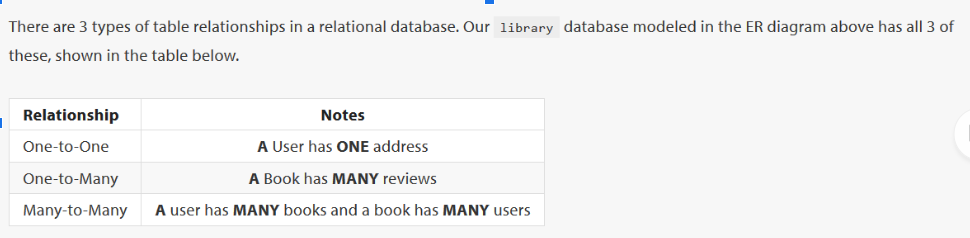

In [ ]:
# Relashionships  one-to-one | one-to-many | many-to-many

#primary key and foreign key both have same type. (here is One-To-One relationship)
create table car (
    id BIGSERIAL NOT NULL PRIMARY KEY,
    make VARCHAR (100) NOT NULL,
    model VARCHAR(100) NOT NULL,
    price NUMERIC(19, 2) NOT NULL
);

# we create car table first because the person table needs the relationship we being created
create table person (
    id BIGSERIAL NOT NULL PRIMARY KEY,
    first_name VARCHAR(50) NOT NULL,
    last_name VARCHAR(50) NOT NULL,
    email VARCHAR(100),
    car_id BIGINT REFERENCES car (id),
    UNIQUE(car_id)
);

# Add foreign key between car and person tables, car_id is same as id column in car table:
UPDATE person SET car_id = 2 WHERE id = 1;
UPDATE person SET car_id = 1 WHERE id =2;

#since this is 1-to-1 relationship each item can only connect to one other of ther table.

One-to-Many

A one-to-many relationship exists between two entities if an entity instance in one of the tables can be associated with multiple records (entity instances) in the other table. The opposite relationship does not exist; that is, each entity instance in the second table can only be associated with one entity instance in the first table.


In [ ]:
CREATE TABLE users (
  id serial,
  username VARCHAR(25) NOT NULL,
  enabled boolean DEFAULT TRUE,
  last_login timestamp NOT NULL DEFAULT NOW(),
  PRIMARY KEY (id));

 #one to one: User has one address
CREATE TABLE addresses (
  user_id int NOT NULL,
  street VARCHAR(30) NOT NULL,
  city VARCHAR(30) NOT NULL,
  state VARCHAR(30) NOT NULL,
  PRIMARY KEY (user_id),
  CONSTRAINT fk_user_id FOREIGN KEY (user_id) REFERENCES users (id)
);


CREATE TABLE books (
  id serial,
  title VARCHAR(100) NOT NULL,
  author VARCHAR(100) NOT NULL,
  published_date timestamp NOT NULL,
  isbn int,
  PRIMARY KEY (id),
  UNIQUE (isbn)
);

# one to many: Book has many reviews
DROP TABLE IF EXISTS reviews;
CREATE TABLE reviews (
  id serial,
  book_id int NOT NULL,
  user_id int NOT NULL,
  review_content VARCHAR(255),
  rating int,
  published_date timestamp DEFAULT CURRENT_TIMESTAMP,
  PRIMARY KEY (id),
  FOREIGN KEY (book_id) REFERENCES books(id) ON DELETE CASCADE,
  FOREIGN KEY (user_id) REFERENCES users(id) ON DELETE CASCADE
);

# when rows have relation with another table (foreign key) you can’t normally delete them.first delete the 
# row that contains the foreign key, then u can delete the row that is being referenced in other table.

# ** with cascading, when you delete a row the related row with foreign key in other table will also be 
# deleted. (its a bad practise)

Many-To-Many

A many-to-many relationship exists between two entities if for one entity instance there may be multiple records in the other table and vice versa.
Example: A user has many books checked out or may have checked them out in the past. A book has many users that have checked a book out.

In the database world, this sort of relationship is implemented by introducing a third cross-reference table, that holds the relationship between the two entities, which is the PRIMARY KEY of the books table and the PRIMARY KEY of the user table.

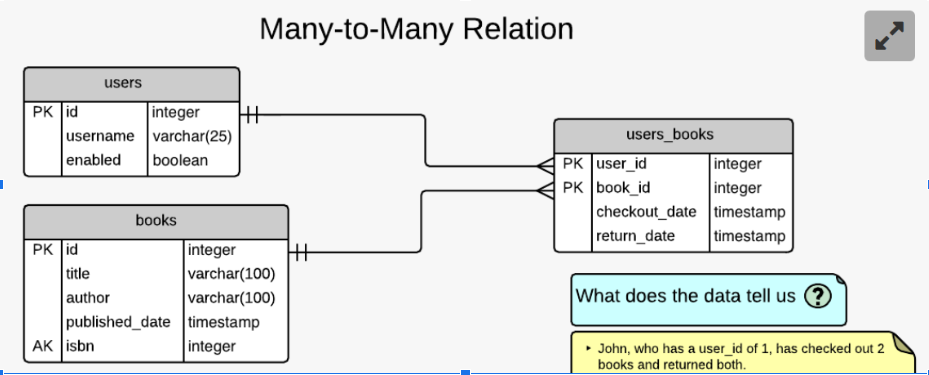

In [ ]:
CREATE TABLE users_books (
  user_id int NOT NULL,
  book_id int NOT NULL,
  checkout_date timestamp,
  return_date timestamp,
  PRIMARY KEY (user_id, book_id),
  FOREIGN KEY (user_id) REFERENCES users(id) ON UPDATE CASCADE,
  FOREIGN KEY (book_id) REFERENCES books(id) ON UPDATE CASCADE
);

In [ ]:
# JOINS   INNER JOIN | LEFT JOIN | RIGHT JOIN | CROSS JOIN | FULL JOIN

# Inner Join happens when two different tables have something in common (usually a foreign key or row)
select person.first_name, car.make, car.model from person join car on person.car_id = car.id;

In [ ]:
# Left Join gets everything from table A + rows from table B that have something in common with A.
select * from person LEFT JOIN car ON car.id = person.car_id;
#  Exactly same as : 
select * from person LEFT JOIN car ON person.car_id = car.id;

# Get everything where table A has nothing in common with B
Select * from person LEFT JOIN car ON car.id = person.car_id WHERE car.* IS NULL;


In [ ]:
# A CROSS JOIN matches every row of the first table with every row of the second table. If the input 
# tables have x and y columns, respectively, the resulting table will have x+y columns. Because CROSS JOINs 
# have the potential to generate extremely large tables, care must be taken to use them only when 
# appropriate.

select * from person CROSS JOIN car;

In [ ]:
# Right JOIN : same as left join but instead selects all rows from B database and common rows from A.

select * from person RIGHT JOIN car ON car.car_uid = person.car_uid;

In [ ]:
# PostgreSQL FULL OUTER JOIN returns all rows from both the participating tables, extended 
# with nulls if they do not have a match on the opposite table. 
# The FULL OUTER JOIN combines the results of both left and right outer joins and returns all 
#(matched or unmatched) rows from the tables on both sides of the join clause.

select * from person FULL JOIN car ON car.car_uid = person.car_uid;

select car.model, person.email from person FULL JOIN car ON car.car_uid = person.car_uid;

UNION

The PostgreSQL UNION clause/operator is used to combine the results of two or more SELECT statements without returning any duplicate rows.To use UNION, each SELECT must have the same number of columns selected, the same number of column expressions, the same data type and have them in the same order but they do not have to be the same length.

<br>
The UNION ALL operator is used to combine the results of two SELECT statements including duplicate rows



In [ ]:
SELECT column1 [, column2 ]
FROM table1 [, table2 ]
[WHERE condition]

UNION

SELECT column1 [, column2 ]
FROM table1 [, table2 ]
[WHERE condition]


select first_name, email from person where first_name = 'jal' 
union 
select first_name, email from person where first_name = 'bob';


Transaction<br><br>
A transaction is a unit of work that is performed against a database. Transactions are units or sequences of work accomplished in a logical order, whether in a manual fashion by a user or automatically by some sort of a database program.
<br><br>
A transaction is the propagation of one or more changes to the database. For example, if you are creating a record, updating a record, or deleting a record from the table, then you are performing transaction on the table. It is important to control transactions to ensure data integrity and to handle database errors.
<br><br>

In [ ]:
BEGIN; or BEGIN TRANSACTION;

DELETE FROM COMPANY WHERE AGE = 25;

COMMIT; or END TRANSACTION; 
or ROLLBACK; (this one will get to situation before transaction)

In [ ]:
# EXTENSIONS

select * from pg_available_extensions; # shows list of all extensions available to install in postgres

FUNCTION

functions, also known as Stored Procedures, allow you to carry out operations that would normally take several queries and round trips in a single function within the database. Functions allow database reuse as other applications can interact directly with your stored procedures instead of a middle-tier or duplicating code.


There are several built-in postgres functions:
Count - Max - Min - Avg - Sum - Array - Numeric

PostgreSQL ARRAY_AGG function is used to concatenate the input values including null into an array.

SELECT ARRAY_AGG(SALARY) FROM COMPANY;  => {20000,15000,20000,65000,85000,45000,10000}


In [ ]:
# Custom Function
CREATE [OR REPLACE] FUNCTION function_name (arguments) 
RETURNS return_datatype AS $variable_name$
   DECLARE
      declaration;
      [...]
   BEGIN
      < function_body >
      [...]
      RETURN { variable_name | value }
   END; LANGUAGE plpgsql;


CREATE OR REPLACE FUNCTION totalRecords ()
RETURNS integer AS $total$
declare
	total integer;
BEGIN
   SELECT count(*) into total FROM COMPANY;
   RETURN total;
END;
$total$ LANGUAGE plpgsql;


# Execute the above function:
select totalRecords();



# stored procedure to draw 20 lines of *, becoming less in each line
DROP PROCEDURE IF EXISTS ONE
CREATE PROCEDURE ONE()
BEGIN
DECLARE x INT;

SET x = 20;
WHILE x > 0 DO

SELECT REPEAT('* ', x)
SET x = x -1;
END WHILE;
END$$

select ONE();



Trigger<br><br>
Triggers are database callback functions, which are automatically performed/invoked when a specified database event occurs.
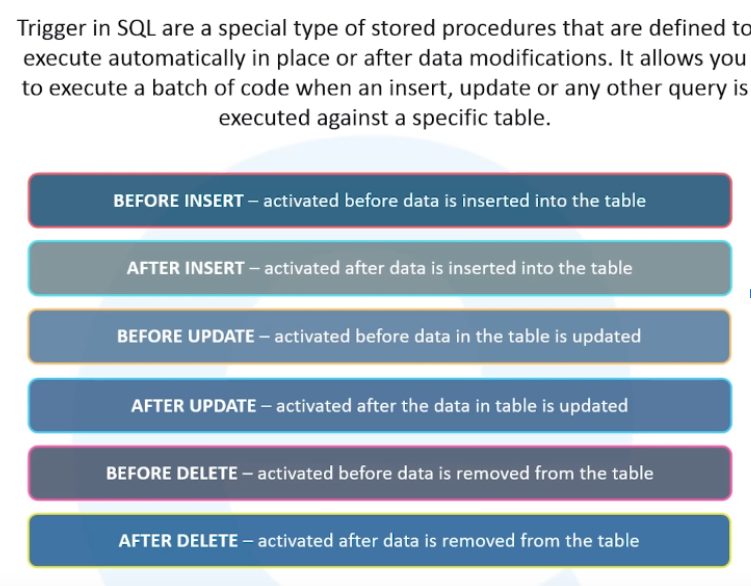
<br>
A trigger that is marked FOR EACH ROW is called once for every row that the operation modifies. In contrast, a trigger that is marked FOR EACH STATEMENT only executes once for any given operation, regardless of how many rows it modifies. <br><br>
If multiple triggers of the same kind are defined for the same event, they will be fired in alphabetical order by name.<br><br>
The BEFORE, AFTER or INSTEAD OF keyword determines when the trigger actions will be executed relative to the insertion, modification or removal of the associated row<br><br>
Triggers are automatically dropped when the table that they are associated with is dropped.<br><br>
event_name could be INSERT, DELETE, UPDATE, and TRUNCATE



In [ ]:
CREATE TRIGGER trigger_name [BEFORE|AFTER|INSTEAD OF] event_name
ON table_name
[
 -- Trigger logic goes here....
];


CREATE TABLE employees(
   id int4 serial primary key, 
   first_name varchar(40) NOT NULL,
   last_name varchar(40) NOT NULL
);

CREATE TABLE employee_audits (
   id int4 serial primary key, 
   employee_id int4 NOT NULL,
   last_name varchar(40) NOT NULL, 
   changed_on timestamp(6) NOT NULL
);


#create a trigger function :

CREATE OR REPLACE FUNCTION log_last_name_changes()
  RETURNS trigger AS
$BODY$
BEGIN
IF NEW.last_name <> OLD.last_name THEN
INSERT INTO employee_audits(employee_id,last_name,changed_on)
VALUES(OLD.id,OLD.last_name,now());
END IF;
 
RETURN NEW;
END;
$BODY$


# we bind the trigger function to the employees table. The trigger name is last_name_changes

CREATE TRIGGER last_name_changes
  BEFORE UPDATE
  ON employees
  FOR EACH ROW
  EXECUTE PROCEDURE log_last_name_changes();



Views
<br><br>
Views are pseudo-tables. That is, they are not real tables; nevertheless appear as ordinary tables to SELECT. A view can represent a subset of a real table, selecting certain columns or certain rows from an ordinary table. A view can even represent joined tables. Because views are assigned separate permissions, you can use them to restrict table access so that the users see only specific rows or columns of a table.

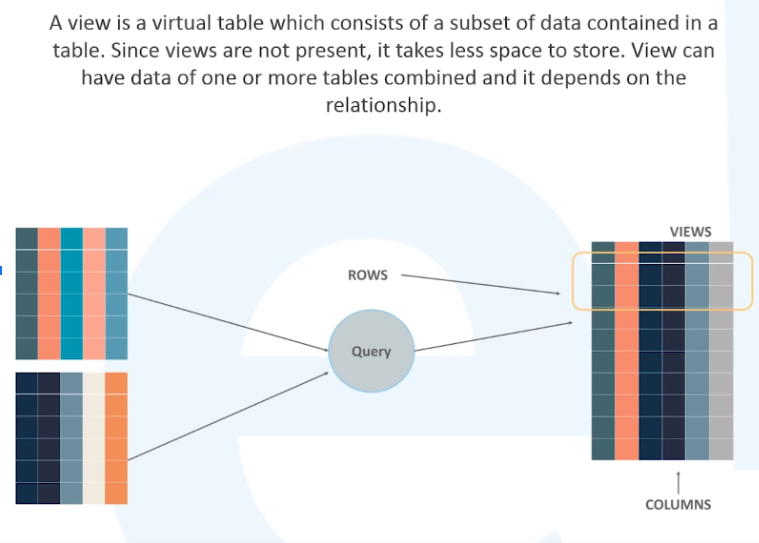

In [ ]:
CREATE [TEMP | TEMPORARY] VIEW view_name AS
SELECT column1, column2.....
FROM table_name
WHERE [condition];


CREATE VIEW COMPANY_VIEW AS SELECT ID, NAME, AGE FROM  COMPANY;

DROP VIEW COMPANY_VIEW;

INTO

The PostgreSQL SELECT INTO statement allows you to create a new table and inserts data returned by a query. The new table columns have name and data types associated with the output columns of the SELECT clause. Unlike the SELECT statement, the SELECT INTO statement does not return data to the client.


In [ ]:
SELECT
    column_list
INTO [ TEMPORARY | TEMP | UNLOGGED ] [ TABLE ] new_table_name
FROM
    table_name
WHERE
    condition;


SELECT
    film_id,
    title,
    rental_rate
INTO TABLE film_r
FROM
    film
WHERE
    rating = 'R'
AND rental_duration = 5
ORDER BY
    title;
    
    
# The following statement creates a temporary table named short_film that contains all films whose 
# lengths are under 60 minutes.
SELECT
    film_id,
    title,
    length
INTO TEMP TABLE short_film
FROM
    film
WHERE
    length < 60
ORDER BY
    Title;

In [ ]:
# if-then-else logic in SQL

IF ((SELECT COUNT(*) FROM table1 WHERE project = 1) > 0) 
    SELECT product, price FROM table1 WHERE project = 1
ELSE IF ((SELECT COUNT(*) FROM table1 WHERE project = 2) > 0) 
    SELECT product, price FROM table1 WHERE project = 2
ELSE IF ((SELECT COUNT(*) FROM table1 WHERE project = 3) > 0)
    SELECT product, price FROM table1 WHERE project = 3

In [ ]:
# PostgreSQL CASE expression

CASE
      WHEN condition_1  THEN result_1
 	WHEN condition_2  THEN result_2
 	[WHEN ...]
 	[ELSE result_n]
END


SELECT 
SUM (CASE
        WHEN rental_rate = 0.99 THEN 1
        ELSE 0
    END) AS "Mass",

SUM (CASE
        WHEN rental_rate = 2.99 THEN 1
        ELSE 0
    END) AS "Economic",

SUM (CASE
        WHEN rental_rate = 4.99 THEN 1
        ELSE 0
    END ) AS "Luxury"
FROM
film;


select 
CASE
    WHEN Grade >= 8 THEN Name
    WHEN Grade < 8 THEN NULL
END AS NAME
, Grade, Marks
FROM Students LEFT JOIN Grades on Students.Marks BETWEEN Grades.Min_Mark AND Grades.Max_Mark
ORDER BY Grade desc,
CASE
    WHEN Grade >= 8 THEN Name
    WHEN Grade < 8 THEN Marks
END ASC;


In [ ]:
# Exercises 


select * from CITY where POPULATION > 100000 and COUNTRYCODE = 'USA';

select Name from city where population > 120000 and COUNTRYCODE = 'USA';

select * from city;

select * from city where id = 1661;

select * from city where countrycode ='JPN';

select name from city where countrycode= 'JPN';

select city, state from station;

select distinct city from station where id%2=0;

select (count(CITY)) - (count(distinct CITY)) from station;

select city, LENGTH(city) from station where LENGTH(city)=(select MAX(LENGTH(city)) from station) order by city limit 1;

select city, LENGTH(city) from station where length(city)=(select MIN(LENGTH(city)) from station) order by city limit 1;

select distinct city from station where LEFT(city, 1) in ("i", "e", "a", "o", "u");

select distinct city from station where RIGHT(city, 1) in ("i", "e", "a", "o", "u");

select distinct city from station where LEFT(city,1) in ("i", "e", "a", "o", "u") and RIGHT(city, 1) in ("i", "e", "a", "o", "u"); 

select distinct city from station where LEFT(city, 1) not in ("i", "e", "a", "o", "u");

select distinct city from station where RIGHT(city, 1) not in ("i", "e", "a", "o", "u");

select distinct city from station where LEFT(city,1) not in ("i", "e", "a", "o", "u") OR RIGHT(city, 1) not in ("i", "e", "a", "o", "u");

select distinct city from station where left(city,1) not in ("i", "e", "a", "o", "u") AND right(city, 1) not in ("i", "e", "a", "o", "u");
select Name from STUDENTS where Marks > 75 order by RIGHT(Name, 3), ID;

select name from Employee order by name;

select name from Employee where salary > 2000 and months < 10 order by employee_id;

# S here is the selected row therefore we have S.LAT_N
# We want the median latitude of the 
select round(S.LAT_N, 4) from station as S where (select count(LAT_N) from station where LAT_N < S.LAT_N) = (select count(LAT_N) from station where LAT_N > S.LAT_N);

select round(LAT_N, 4) from STATION where LAT_N < 137.2345 order by LAT_N desc limit 1;

select round(LONG_W, 4) from STATION where LAT_N = (select LAT_N from station where LAT_N < 137.2345 order by LAT_N desc limit 1) limit 1;

select round(LAT_N,4) from STATION where LAT_N > 38.7780 order by LAT_N limit 1;

select round(LONG_W, 4) from STATION where LAT_N = (select LAT_N from station where LAT_N >38.7780 order by LAT_N limit 1) limit 1;

select round(abs(max(LAT_N) - min(LAT_N)) + (max(LONG_W) - min(LONG_W)), 4) from STATION;

select round(sqrt(power(max(LAT_N) - min(LAT_N), 2) + power(max(LONG_W) - min(LONG_W), 2)), 4) from STATION;


# here we use distinct because our tables might contain duplicate records and we want only unique values
select company_code as C, founder, 
(select count(distinct lead_manager_code) from Lead_Manager where company_code = C),
(select count(distinct senior_manager_code) from Senior_Manager where company_code = C),
(select count(distinct manager_code) from Manager where company_code = C),
(select count(distinct employee_code) from Employee where company_code = C)
from Company
order by Company.company_code asc;

select AVG(population) from city where district = "California";

select FLOOR(AVG(population)) from city;

select count(*) from city where population > 100000;

select sum(population) from city where countrycode="JPN";

select MAX(population) - MIN(population) from city;


AVG(replace(salary, 0, '')) # remove salaries that are zero from query
select CEILING(AVG(salary) - AVG(replace(salary, 0, ''))) from EMPLOYEES ;

select MAX(months * salary) as M, count(*) from employee group by months * salary order by months * salary desc limit 1;

select ROUND(sum(LAT_N),2), ROUND(sum(LONG_W),2) from station;

select round(sum(LAT_N),4) from station where LAT_N > 38.7880 AND LAT_N < 137.2345;

select round(max(LAT_N), 4) from STATION where LAT_N < 137.2345;



# here we might reach a situation where both of power and age are the same amount, so we select based on the least amount of COINS_NEEDED
SELECT W.ID, P.AGE, W.COINS_NEEDED, W.POWER 
FROM WANDS AS W
JOIN WANDS_PROPERTY AS P
ON (W.CODE = P.CODE) 
WHERE P.IS_EVIL = 0 AND W.COINS_NEEDED = (SELECT MIN(COINS_NEEDED) 
FROM WANDS AS X
    JOIN WANDS_PROPERTY AS Y 
    ON (X.CODE = Y.CODE) 
    # here we want to get exactly the same thing as the outer select so we set condition where X,W and Y,P are same, then select least COINS_NEEDED 
    WHERE X.POWER = W.POWER AND Y.AGE = P.AGE) 
ORDER BY W.POWER DESC, P.AGE DESC;

select sum(city.population) from city join country on CITY.CountryCode = COUNTRY.Code where country.continent = 'Asia';

select city.name from city join country on city.CountryCode = country.code where continent = 'Africa';

# find average city population for each continent:
select country.continent, floor(avg(city.population)) from country JOIN city on country.code = city.countrycode 
group by country.continent;

# on Students.Mark BETWEEN Grade.Min_Mark AND Grade.Max_Mark
select Name, Grade, Marks from Students LEFT JOIN Grades on Students.Mark BETWEEN Grade.Min_Mark 
AND Grade.Max_Mark;

select CONCAT(Name, "(" , LEFT(Occupation, 1) , ")") from OCCUPATIONS order by Name;

select CONCAT("There are a total of ", count(*), " ", LOWER(Occupation), "s.") from OCCUPATIONS group by 
Occupation order by count(*), Occupation;